In [1]:
from dreye import Spectrum, MeasuredSpectraContainer, \
    MeasuredSpectrum, convert_measurement, CalibrationSpectrum, \
    AbstractSpectrum, Signal, Domain
from dreye import LogPhotoreceptor, \
    RelativeOpsinSensitivity, Spectrum, Domain
from dreye.stimuli.tempochromatic.noise import PRWhiteNoiseStimulus, \
    PRBrownNoiseStimulus, TransformWhiteNoiseStimulus, \
    TransformBrownNoiseStimulus, IlluminantWhiteNoiseStimulus, \
    IlluminantBgWhiteNoiseStimulus
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from dreye import create_gaussian_spectrum
import pint
np.random.seed(10)

%matplotlib inline

import warnings

In [2]:
# np.seterr(all='raise')

In [3]:
wl = np.arange(300, 600)
s = norm.pdf(wl, 450, 10)
s /= np.sum(s)
noise = 0.01
s_noise = s + np.random.normal(0, noise, size=s.shape)
ops = norm.pdf(wl, 433, 40)

In [4]:
opsin2 = RelativeOpsinSensitivity(
    norm.pdf(wl[:,None], np.asarray([[330, 450, 560]]), 40),
    domain=wl, 
)

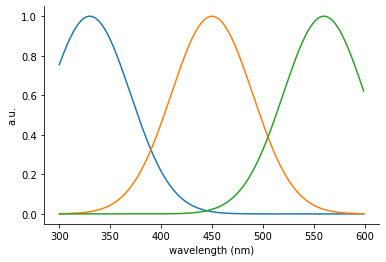

In [5]:
opsin2.plot()

In [6]:
pr = LogPhotoreceptor(opsin2)
cal = CalibrationSpectrum(
    np.ones(wl.shape), 
    wl, 
    area=1
)

In [7]:
pr.sensitivity.labels

Int64Index([0, 1, 2], dtype='int64')

In [8]:
from dreye.io import read_json

In [9]:
devices = read_json('../tutorials/data/measurement_test.json.gz')

In [10]:
mss = devices.spms

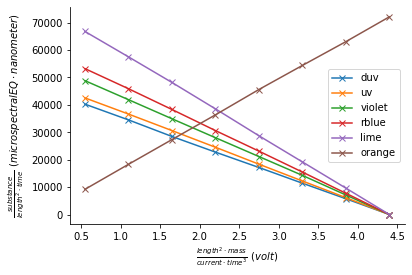

In [11]:
mss.intensities.plot(labels=True, marker='x')

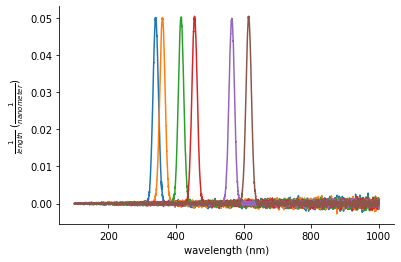

In [12]:
mss.normalized_spectrum.plot()

In [13]:
gaussians = create_gaussian_spectrum(
    wl, 
    [340, 440, 540], 
    intensity=100, 
    background=np.ones(wl.shape)/10, 
    add_background=True, 
    cdf=False,
    filter=True,
)

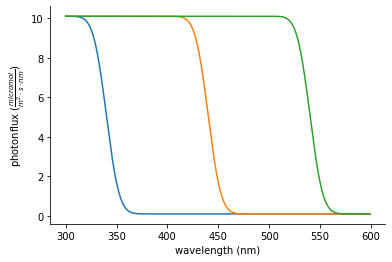

In [14]:
gaussians.plot()

In [15]:
background = Spectrum(np.ones(len(wl))*10, domain=wl, units='photonflux')

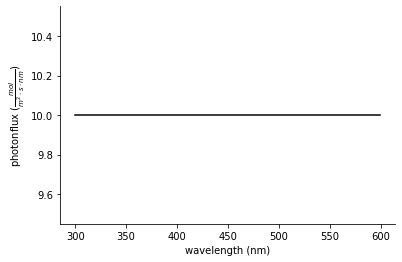

In [16]:
background.plot()

In [17]:
wn = PRWhiteNoiseStimulus(
    photoreceptor=pr, 
    measured_spectra=mss, 
    background=background,
    rate=60, 
    n_channels=3, 
    mean=0, 
    var=np.asarray([2,2,2]), 
    minimum=-100, 
    maximum=100, 
    iterations=2, 
    start_delay=1, 
    end_dur=1, 
    pause_dur=1, 
    seed=10, 
    filter_style='window', 
    filter_function='exponential', 
    filter_along_axis=0, 
    filter_kwargs={'M':5, 'tau':2.5}
)

In [18]:
wn.transform()

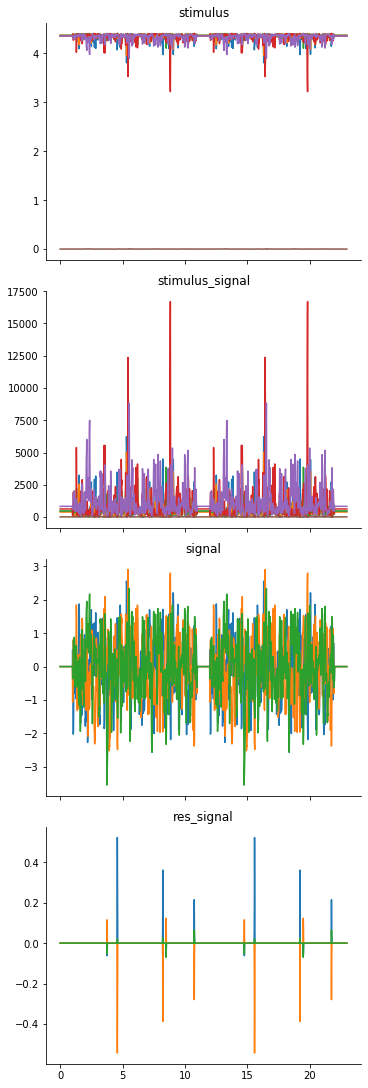

In [19]:
axes = wn.plot(
    fig_kws={'figsize':(5, 15)}
)

In [20]:
wn.events.columns

Index(['delay', 'dur', 'iter', 'name', '0', '1', '2', 'pr_0', 'pr_1', 'pr_2',
       'duv', 'uv', 'violet', 'rblue', 'lime', 'orange', 'stimout_duv',
       'stimout_uv', 'stimout_violet', 'stimout_rblue', 'stimout_lime',
       'stimout_orange'],
      dtype='object')

In [21]:
wn = TransformWhiteNoiseStimulus(
    linear_transform=np.ones(3)[:, None], 
    photoreceptor=pr, 
    measured_spectra=mss, 
    background=background,
    rate=60, 
    n_channels=1, 
    mean=0, 
    var=50, 
    iterations=2, 
    start_delay=2, 
    end_dur=2, 
    pause_dur=2, 
    seed=10, 
    filter_style='window', 
    filter_function='exponential', 
    filter_along_axis=0, 
    filter_kwargs={'M':61, 'tau':20}
)

In [22]:
wn.transform()

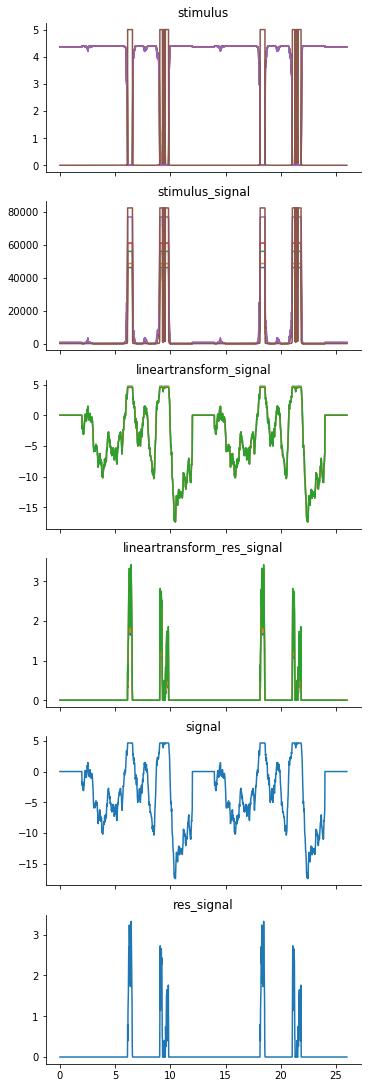

In [23]:
axes = wn.plot(
    fig_kws={'figsize':(5, 15)}
)

In [24]:
wn = IlluminantWhiteNoiseStimulus(
    illuminant=gaussians, 
    photoreceptor=pr, 
    measured_spectra=mss, 
    background=background,
    rate=60, 
    n_channels=3, 
    mean=0, 
    var=[0.5, 0.5, 0.5], 
    minimum=-100, 
    maximum=100, 
    iterations=2, 
    start_delay=2, 
    end_dur=2, 
    pause_dur=2, 
    seed=10, 
    filter_style='window', 
    filter_function='exponential', 
    filter_along_axis=0, 
    filter_kwargs={'M':61, 'tau':20}
)

In [25]:
wn.linear_transform

array([[-14.53421243, -13.81045822, -13.80556045],
       [-18.10377237, -14.69699087, -13.81994986],
       [-18.42067505, -18.22505235, -14.76812673]])

In [26]:
wn.create()

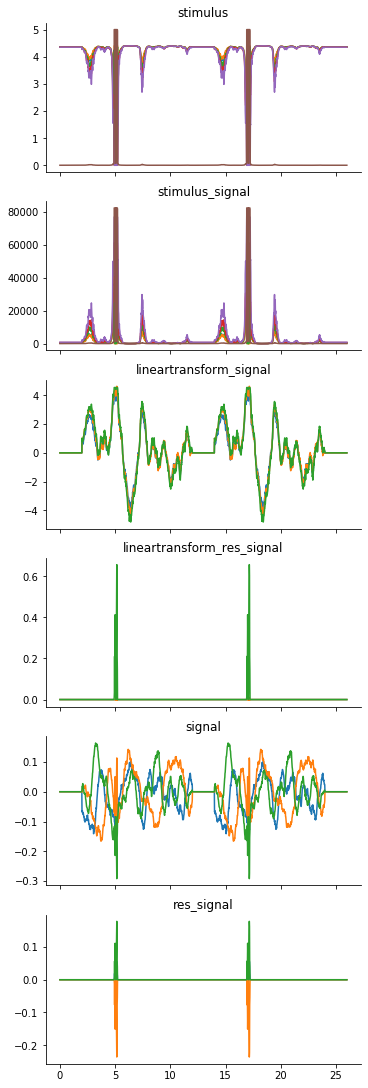

In [27]:
axes = wn.plot(
    fig_kws={'figsize':(5, 15)}
)

In [28]:
from dreye.constants import ureg

In [29]:
normalized_g = AbstractSpectrum(gaussians.magnitude, domain=gaussians.domain, units=ureg(None).units)

In [30]:
wn = IlluminantBgWhiteNoiseStimulus(
    illuminant=normalized_g, 
    photoreceptor=pr, 
    measured_spectra=mss, 
    background=background,
    rate=60, 
    n_channels=3, 
    mean=0, 
    var=[0.5, 0.5, 0.5], 
    minimum=None, 
    maximum=None, 
    iterations=2, 
    start_delay=2, 
    end_dur=2, 
    pause_dur=2, 
    seed=10, 
    filter_style='window', 
    filter_function='exponential', 
    filter_along_axis=0, 
    filter_kwargs={'M':61, 'tau':20}, 
    bg_func=lambda x, bg: (x * bg) + bg 
)

In [31]:
wn.create()

/Users/matthias.christenson/Documents/dreye/dreye/core/photoreceptor.py:462: RuntimeWarning: invalid value encountered in log
  return np.log(arr)


In [32]:
print(wn.metadata['normalized_weight_matrix'])

[[ 1.23046117e-03  9.66558829e-04  1.48632378e-04  1.05204977e-05  -1.82763128e-06  1.63855746e-07] [ 3.31043088e-05  9.18829997e-05  6.86396151e-04  9.75735833e-04   1.49242317e-05  3.03405447e-06] [ 1.01271964e-06 -8.14511855e-09  3.81833612e-06  4.51628840e-05   1.16422055e-03  1.83913626e-05]] / nanometer / spectral_E_Q


In [33]:
wn.events

,delay,dur,iter,name,0,1,2,pr_0,pr_1,pr_2
0,2.0,10.0,0,IlluminantBgWhiteNoiseStimulus,"[-0.06783482726971353, -0.06526587213935309, -...","[-0.0011443084546269916, 0.000581429032537261,...","[0.01692325497243957, 0.017200967777877964, 0....","[-0.18776755550292265, -0.14910609592986004, -...","[0.1436073039844907, 0.15245982349237808, 0.16...","[0.056716278361340404, 0.05816840514853714, 0...."
1,14.0,10.0,1,IlluminantBgWhiteNoiseStimulus,"[-0.06783482726971353, -0.06526587213935309, -...","[-0.0011443084546269916, 0.000581429032537261,...","[0.01692325497243957, 0.017200967777877964, 0....","[-0.18776755550292265, -0.14910609592986004, -...","[0.1436073039844907, 0.15245982349237808, 0.16...","[0.056716278361340404, 0.05816840514853714, 0...."


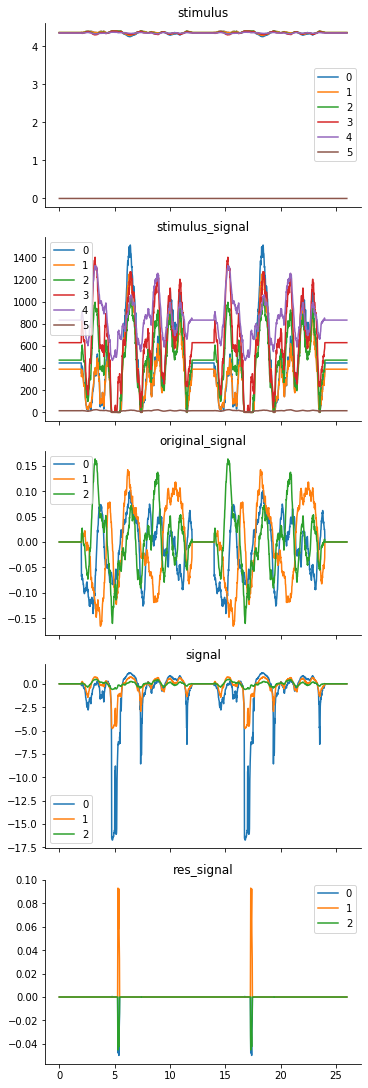

In [35]:
axes = wn.plot(
    fig_kws={'figsize':(5, 15)}, 
    add_legend=True
)

In [33]:
wn.metadata

{'random_signal': array([[-0.18776756,  0.1436073 ,  0.05671628],
        [-0.1491061 ,  0.15245982,  0.05816841],
        [-0.11188709,  0.16089898,  0.05820348],
        ...,
        [-0.29017073, -0.13603135,  0.01244141],
        [-0.20847055, -0.09728534,  0.01916143],
        [-0.18663165, -0.09160936,  0.01223571]]) <Unit('dimensionless')>,
 'original_signal': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'normalized_weight_matrix': array([[ 1.23046117e-03,  9.66558829e-04,  1.48632378e-04,
          1.05204977e-05, -1.82763128e-06,  1.63855746e-07],
        [ 3.31043088e-05,  9.18829997e-05,  6.86396151e-04,
          9.75735833e-04,  1.49242317e-05,  3.03405447e-06],
        [ 1.01271964e-06, -8.14511855e-09,  3.81833612e-06,
          4.51628840e-05,  1.16422055e-03,  1.83913626e-05]]) <Unit('1 / nanometer / spectral_E_Q')>,
 'channel_weights': array([[445.63933073, 389.540810

In [34]:
from dreye.stimuli.tempochromatic.step import (
    PRStepStimulus, TransformStepStimulus
)

In [35]:
step = PRStepStimulus(
    photoreceptor=pr, 
    measured_spectra=mss, 
    background=background,
    values={
        'rh3': [0.2], 
        'rh4': [0.4], 
        'rh5': [0.2]
    }, 
    separate_channels=True, 
    repetitions=1, 
    iterations=1, 
    rate=60., 
    durations=[3], 
    pause_durations=[2], 
    randomize=True, 
    start_delay=1, 
    end_dur=1
)

In [36]:
step.create()

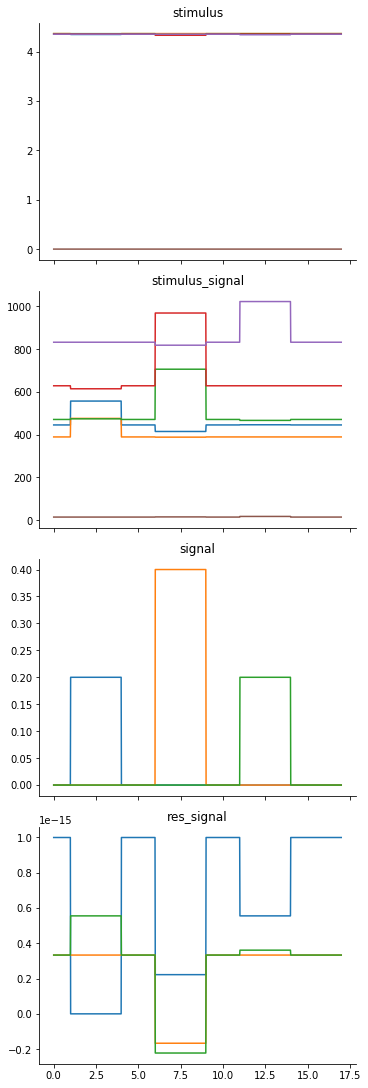

In [37]:
axes = step.plot(
    fig_kws={'figsize':(5, 15)}
)

In [38]:
step.events

,rh3,rh4,rh5,dur,pause,repeat,iter,delay,name,0,...,violet,rblue,lime,orange,stimout_duv,stimout_uv,stimout_violet,stimout_rblue,stimout_lime,stimout_orange
0,0.2,0.0,0.0,3.0,2.0,0,0,1.0,PRStepStimulus,2.000000e-01,...,474.254147,614.711937,832.825450,14.898361,4.346883,4.357414,4.363300,4.356398,4.352442,0.000892
1,0.0,0.4,0.0,3.0,2.0,1,0,6.0,PRStepStimulus,-2.220446e-16,...,706.190429,968.899956,818.435859,15.668671,4.360435,4.365249,4.345352,4.331275,4.353264,0.000938
2,0.0,0.0,0.2,3.0,2.0,2,0,11.0,PRStepStimulus,-5.551115e-16,...,466.909812,628.887555,1022.520528,17.899887,4.357446,4.365163,4.363869,4.355392,4.341610,0.001072


In [61]:
step = TransformStepStimulus(
    linear_transform=asarray([
        [0.5, -0.5, 0.5], [1, 1, -2]
    ]).T,
    linear_transform_labels=['a', 'b'],
    photoreceptor=pr, 
    measured_spectra=mss, 
    background=background,
    values={
        'rh3': [0.2, 0.4, 0.3], 
        'rh4': [0.4, 0.2, 0.1], 
    }, 
    separate_channels=True, 
    repetitions=1, 
    iterations=1, 
    rate=60., 
    durations=[3, 3], 
    pause_durations=[2, 3], 
    randomize=True, 
    start_delay=1, 
    end_dur=1
)

In [62]:
step.create()

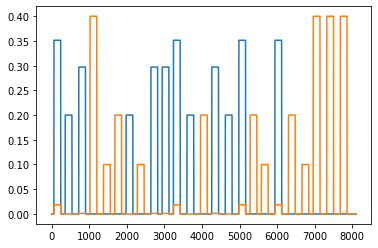

In [63]:
plt.plot(step.signal)

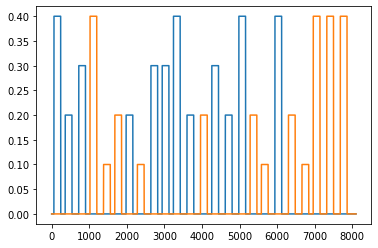

In [64]:
plt.plot(step.metadata['target_signal'])

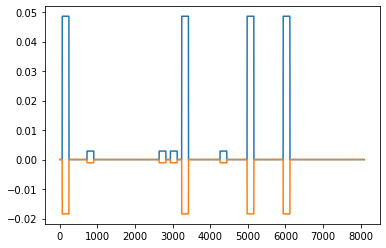

In [65]:
plt.plot(step.metadata['res_signal'])

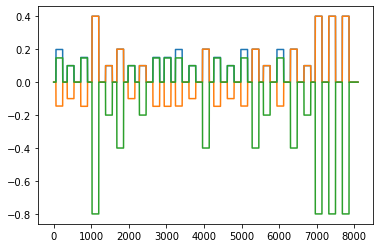

In [66]:
plt.plot(step.metadata['lineartransform_signal'])

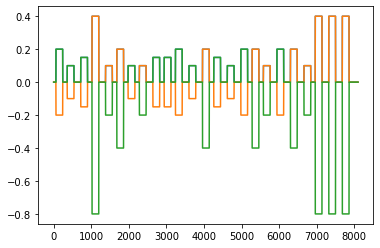

In [67]:
plt.plot(step.metadata['lineartransform_target_signal'])

In [68]:
step.transform()

/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


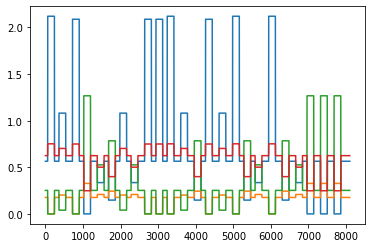

In [69]:
plt.plot(step.stimulus)

In [70]:
step.events

,rh3,rh4,dur,pause,repeat,iter,delay,name,0,1,...,a,b,LED300,LED360,LED400,LED500,stiminLED300,stiminLED360,stiminLED400,stiminLED500
0,0.4,0.0,3.0,2.0,1,0,1.0,TransformStepStimulus,0.198190,-0.145118,...,3.514082e-01,1.843593e-02,2.120091,0.000000,1.129601e-09,0.751806,0.019278581819134943 microspectral_E_Q * nanom...,2.0103790057497892e-10 microspectral_E_Q * nan...,3.904411154836745e-11 microspectral_E_Q * nano...,0.03771853207178328 microspectral_E_Q * nanometer
1,0.2,0.0,3.0,2.0,0,0,6.0,TransformStepStimulus,0.100000,-0.100000,...,2.000000e-01,3.811639e-16,1.080948,0.202531,4.045610e-02,0.702227,0.010375279936509881 microspectral_E_Q * nanom...,0.00901322691218262 microspectral_E_Q * nanometer,0.001398345839431797 microspectral_E_Q * nanom...,0.0353836400160208 microspectral_E_Q * nanometer
2,0.3,0.0,3.0,3.0,2,0,12.0,TransformStepStimulus,0.149898,-0.146752,...,2.971280e-01,1.094275e-03,2.087804,0.000000,1.974457e-08,0.749872,0.018351910067571826 microspectral_E_Q * nanom...,1.0001311780941161e-09 microspectral_E_Q * nan...,6.824616352783722e-10 microspectral_E_Q * nano...,0.03762746181689992 microspectral_E_Q * nanometer
3,0.0,0.4,3.0,2.0,3,0,17.0,TransformStepStimulus,0.400000,0.400000,...,5.619426e-16,4.000000e-01,0.000000,0.327024,1.266943e+00,0.248386,0.0031632387001899608 microspectral_E_Q * nano...,0.01233016118786694 microspectral_E_Q * nanometer,0.04413753356151029 microspectral_E_Q * nanometer,0.014010411815589308 microspectral_E_Q * nanom...
4,0.0,0.1,3.0,3.0,5,0,23.0,TransformStepStimulus,0.100000,0.100000,...,6.560928e-16,1.000000e-01,0.336000,0.208600,5.262745e-01,0.501316,0.005952433807413738 microspectral_E_Q * nanom...,0.009174920928278972 microspectral_E_Q * nanom...,0.018190425362593025 microspectral_E_Q * nanom...,0.025921922576581637 microspectral_E_Q * nanom...
5,0.0,0.2,3.0,2.0,4,0,28.0,TransformStepStimulus,0.200000,0.200000,...,2.098710e-16,2.000000e-01,0.148028,0.244082,7.842166e-01,0.399901,0.004836421480222537 microspectral_E_Q * nanom...,0.010120300821036071 microspectral_E_Q * nanom...,0.0271060701185861 microspectral_E_Q * nanometer,0.021145894331862678 microspectral_E_Q * nanom...
6,0.2,0.0,3.0,2.0,0,0,33.0,TransformStepStimulus,0.100000,-0.100000,...,2.000000e-01,3.811639e-16,1.080948,0.202531,4.045610e-02,0.702227,0.010375279936509881 microspectral_E_Q * nanom...,0.00901322691218262 microspectral_E_Q * nanometer,0.001398345839431797 microspectral_E_Q * nanom...,0.0353836400160208 microspectral_E_Q * nanometer
7,0.0,0.1,3.0,2.0,5,0,38.0,TransformStepStimulus,0.100000,0.100000,...,6.560928e-16,1.000000e-01,0.336000,0.208600,5.262745e-01,0.501316,0.005952433807413738 microspectral_E_Q * nanom...,0.009174920928278972 microspectral_E_Q * nanom...,0.018190425362593025 microspectral_E_Q * nanom...,0.025921922576581637 microspectral_E_Q * nanom...
8,0.3,0.0,3.0,3.0,2,0,44.0,TransformStepStimulus,0.149898,-0.146752,...,2.971280e-01,1.094275e-03,2.087804,0.000000,1.974457e-08,0.749872,0.018351910067571826 microspectral_E_Q * nanom...,1.0001311780941161e-09 microspectral_E_Q * nan...,6.824616352783722e-10 microspectral_E_Q * nano...,0.03762746181689992 microspectral_E_Q * nanometer
9,0.3,0.0,3.0,2.0,2,0,49.0,TransformStepStimulus,0.149898,-0.146752,...,2.971280e-01,1.094275e-03,2.087804,0.000000,1.974457e-08,0.749872,0.018351910067571826 microspectral_E_Q * nanom...,1.0001311780941161e-09 microspectral_E_Q * nan...,6.824616352783722e-10 microspectral_E_Q * nano...,0.03762746181689992 microspectral_E_Q * nanometer


In [71]:
wn.events

,delay,dur,iter,name,0,1,pr0,pr1,pr2
0,2.0,10.0,0,IlluminantBgWhiteNoiseStimulus,"[-0.0014492872355317784, -0.001699283586882110...","[-0.006515941643004829, -0.002780006182778814,...","[-0.008449469638210343, -0.004681678930667354,...","[-0.008083516904344243, -0.004589644655309594,...","[-0.008103852878452462, -0.0046140577299139994..."
1,14.0,10.0,1,IlluminantBgWhiteNoiseStimulus,"[-0.0014492872355317784, -0.001699283586882110...","[-0.006515941643004829, -0.002780006182778814,...","[-0.008449469638210343, -0.004681678930667354,...","[-0.008083516904344243, -0.004589644655309594,...","[-0.008103852878452462, -0.0046140577299139994..."


In [72]:
wn.save('test_wn_stim.json')

/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/Users/matthias.christenson/anaconda3/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


In [73]:
step.save('test_step_stim.json')

In [74]:
step2 = PRStepStimulus.load('test_step_stim.json')

In [75]:
wn2 = IlluminantWhiteNoiseStimulus.load('test_wn_stim.json')

In [76]:
step2.settings.keys()

dict_keys(['rate', 'seed', 'linear_transform', 'linear_transform_labels', 'photoreceptor', 'background', 'fit_kwargs', 'spectrum_measurement', 'values', 'durations', 'pause_durations', 'repetitions', 'iterations', 'randomize', 'start_delay', 'end_dur', 'aligned_durations', 'separate_channels', 'baseline_values', 'func'])

In [77]:
wn2.settings.keys()

dict_keys(['rate', 'seed', 'illuminant', 'bg_func', 'photoreceptor', 'background', 'fit_kwargs', 'spectrum_measurement', 'filter_style', 'filter_function', 'filter_kwargs', 'filter_along_axis', 'extra_kwargs', 'stim_dur', 'mean', 'var', 'minimum', 'maximum', 'iterations', 'start_delay', 'end_dur', 'pause_dur', 'n_channels', 'channel_names'])

In [81]:
wn2.settings['bg_func']

<function __main__.<lambda>(x, bg)>

In [78]:
step2

In [79]:
wn2